In [91]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 1

* Gamma prior distribution

Firstly, there is a need to prepare prior distribution. Parameters are set due to our own speculations and intuition.

In [92]:
with open('my_model_prior.stan', 'r') as file:
    print(file.read())

data {
	vector[2] params; 
}

generated quantities {
  real y = gamma_rng (params[1], params[2]);
}


Parameters are set to: alpha = 1 and beta = 2

In [93]:
from pystan import StanModel
tuning2 = StanModel('my_model_prior.stan')

params = [1, 2]
data=dict(params = params)
tuned2 = tuning2.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_656bbc4d88987fb6fc8bd7adc5eb5943 NOW.


Now, after compiling the model, it is possible to plot results.

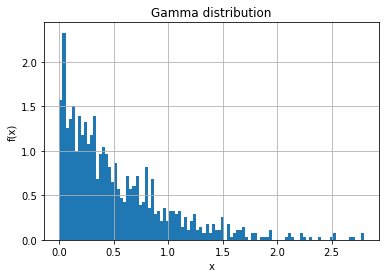

In [94]:
y = tuned2.extract()['y']
plt.hist(y, 100, density=True, cumulative=False)
plt.title('Gamma distribution')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

* Gamma posterior distribution

After creating prior distribution, stan's posterior distribution may be compiled.

In [95]:
with open('my_model.stan', 'r') as file:
    print(file.read())

functions {

  vector tail_delta(vector y, vector params, real[] x_r, int[] x_i) {
    vector[3] deltas;
    deltas[1] = gamma_cdf(params[1], exp(y[1]), exp(y[2])) - exp(y[3]);
	deltas[2] = gamma_cdf(params[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
	deltas[3] = exp(y[1])/exp(y[2]) - 8;
	
    return deltas;
  }
}

data {
  vector[3] y_guess;
  vector[2] params; 
}

transformed data {

  vector[3] y;
  real x_r[0];
  int x_i[0];

  y = algebra_solver(tail_delta, y_guess, params, x_r, x_i);
}

generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}


Parameters are set such that: alpha = 5, beta = 10 as we want to have 98% probability beetwen that values.

In [96]:
params = np.array([5, 10])
y_guess = np.array([np.log(8), np.log(1), np.log(0.09)])
print(y_guess)

[ 2.07944154  0.         -2.40794561]


In [97]:
from pystan import StanModel
tuning2 = StanModel('my_model.stan')

data=dict(y_guess = y_guess, params = params)
tuned2 = tuning2.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_59524561a69e4b2ff74b2a4a3db19e25 NOW.


Counted by stan's model results are printed below.

In [98]:
alpha = np.round(tuned2.extract()['alpha'][0])
print("Calculated alpha: " + alpha)
beta = np.round(tuned2.extract()['beta'][0])
print("Calculated beta: " + beta)

TypeError: can only concatenate str (not "numpy.float64") to str

We can print gamma distribution and compare it with a prior model distribution.

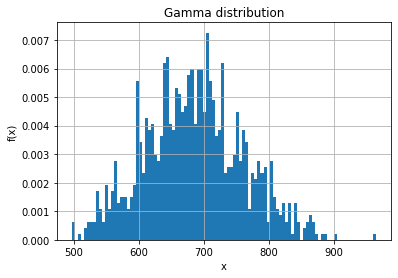

In [27]:
samples = np.random.gamma(alpha, beta, 1000)
plt.hist(samples, 100, density=True, cumulative=False)
plt.title('Gamma distribution')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

* invGamma prior distribution

When it comes to inv_gamma similar things are done as it is above with gamma distribution.

In [28]:
with open('inv-gamma-prior.stan', 'r') as file:
    print(file.read())

data {
	vector[2] params; 
}

generated quantities {
  real y = inv_gamma_rng (params[1], params[2]);
}


In [16]:
from pystan import StanModel
tuning2 = StanModel('inv-gamma-prior.stan')

params = [1, 2]
data=dict(params = params)
tuned2 = tuning2.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_505ce17ab424a3cfab8dabcdda6344c4 NOW.


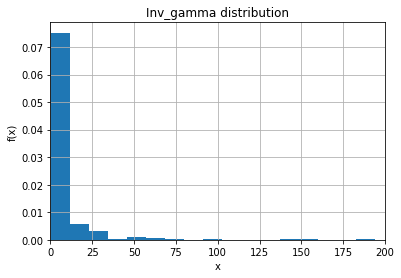

In [17]:
y = tuned2.extract()['y']
plt.hist(y, 100, density=True, cumulative=False)
plt.title('Inv_gamma distribution')
plt.grid()
plt.xlim(0, 200)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

* Inv_gamma posterior distribution

In [29]:
with open('inv-gamma.stan', 'r') as file:
    print(file.read())

functions {

  vector tail_delta(vector y, vector params, real[] x_r, int[] x_i) {
    vector[3] deltas;
	deltas[1] = inv_gamma_cdf(params[1], exp(y[1]), exp(y[2])) - exp(y[3]);
    deltas[2] = inv_gamma_cdf(params[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
	deltas[3] = exp(y[1])/exp(y[2]) - 7;
    return deltas;
  }
}

data {
  vector[3] y_guess;
  vector[2] params; 
}

transformed data {

  vector[3] y;
  real x_r[0];
  int x_i[0];

  y = algebra_solver(tail_delta, y_guess, params, x_r, x_i);
}

generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}


In [32]:
params = np.array([5, 10])
y_guess = np.array([np.log(8), np.log(1), 0.09])
print(params)

[ 5 10]


In [33]:
from pystan import StanModel
model = StanModel('inv-gamma.stan')

data=dict(y_guess = y_guess, params = params)
model = model.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7a895aa00cb227022046e31ab4660e47 NOW.


ValueError: Exception: Exception: inv_gamma_cdf: Shape parameter is nan, but must be > 0!  (in 'inv-gamma.stan' at line 5)
  (in 'inv-gamma.stan' at line 23)


In [55]:
alpha = np.round(model.extract()['alpha'][0])
print("Calculated alpha: " + alpha)
beta = np.round(model.extract()['beta'][0])
print("Calculated beta: " beta)

47.0
7.0


### Exercise 2

Starting with creating stan models for both, neg_binomial and poisson distribution. As thay have to have the same mean, functions takes the same value as a function parameter.

In [83]:
with open('zad2.stan', 'r') as file:
    print(file.read())


data {
  real mu; 
  real phi;
}

generated quantities {
  real y_neg_binomial = neg_binomial_rng(mu, phi);
  int y_poisson = poisson_rng(mu);
}


Mean will be equal to 9.

In [84]:
mu_ = 9
phi_ = 0.1

model = StanModel('zad2.stan')

data=dict(mu = mu_, phi = phi_)
model = model.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_672efa04dc558646a95ea4994dd490a3 NOW.


In [85]:
neg_bin_values = model.extract()['y_neg_binomial']
poisson_values = model.extract()['y_poisson']

Now distributions are printed in order to be compared.

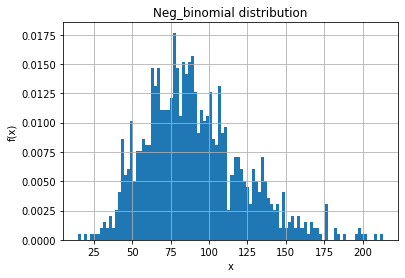

In [88]:
plt.hist(neg_bin_values, 100, density=True, cumulative=False)
plt.title('Neg_binomial distribution')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

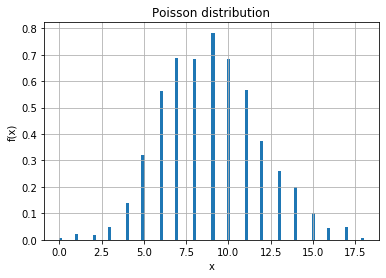

In [89]:
plt.hist(poisson_values, 100, density=True, cumulative=False)
plt.title('Poisson distribution')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

We can see that Poisson distribution decreases much faster in comparison to neg_binomial distribution.

### Exercise 3

Starting with creating stan models for both, student_t and normal distribution. Both distributions are using the same values of parameters.

In [94]:
with open('student_t.stan', 'r') as file:
    print(file.read())

data {
  vector[3] params; 
}

generated quantities {

real student_t_results = student_t_rng(params[1], params[2], params[3]);
real normal_results = normal_rng(params[2], params[3]);
}


Below we will see how changing different parameters influence distributions.

* Changing nu parameter 

We might print all distributions in order to compare them with each other and see how changing nu parameter has influenced them.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.


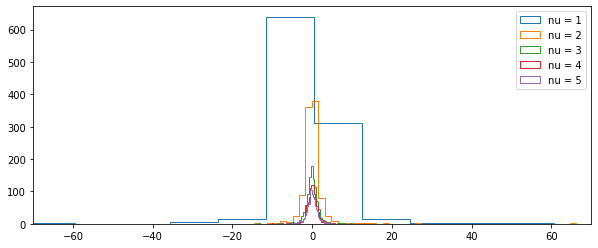

In [116]:
model = StanModel('student_t.stan')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for i in range(1, 6):
    model = StanModel('student_t.stan')
    data = dict(params = [i, 0, 1])
    model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)
    x = model.extract()['student_t_results']
    plt.hist(x, bins = 50, histtype = 'step')
plt.xlim(-70, 70)
plt.legend(['nu = 1' ,'nu = 2', 'nu = 3', 'nu = 4', 'nu = 5', 'nu = 6'])
plt.show()

Now we are printing Normal distribution in order to be able to compare it with above student_t distributions. It is visible that 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.


(array([ 2.,  1.,  0.,  1.,  2.,  0.,  3.,  9., 10., 12.,  8.,  5., 15.,
        12., 29., 31., 33., 31., 32., 40., 61., 58., 41., 35., 52., 50.,
        46., 45., 57., 44., 33., 37., 33., 25., 26., 11., 16.,  9., 13.,
        14.,  3.,  2.,  3.,  3.,  1.,  3.,  0.,  1.,  1.,  1.]),
 array([-3.16042092, -3.0298504 , -2.89927989, -2.76870938, -2.63813886,
        -2.50756835, -2.37699784, -2.24642733, -2.11585681, -1.9852863 ,
        -1.85471579, -1.72414527, -1.59357476, -1.46300425, -1.33243374,
        -1.20186322, -1.07129271, -0.9407222 , -0.81015168, -0.67958117,
        -0.54901066, -0.41844015, -0.28786963, -0.15729912, -0.02672861,
         0.10384191,  0.23441242,  0.36498293,  0.49555344,  0.62612396,
         0.75669447,  0.88726498,  1.0178355 ,  1.14840601,  1.27897652,
         1.40954703,  1.54011755,  1.67068806,  1.80125857,  1.93182909,
         2.0623996 ,  2.19297011,  2.32354062,  2.45411114,  2.58468165,
         2.71525216,  2.84582268,  2.97639319,  3.1069637 ,

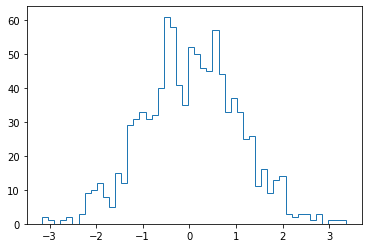

In [112]:
model = StanModel('student_t.stan')
data = dict(params = [1, 0, 1])
model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)
x = model.extract()['normal_results']
plt.hist(x, bins = 50, histtype = 'step')

We can see that the greater value is set to nu parameter, the more the distribution look like the normal one. 

* Changing mu parameter

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.


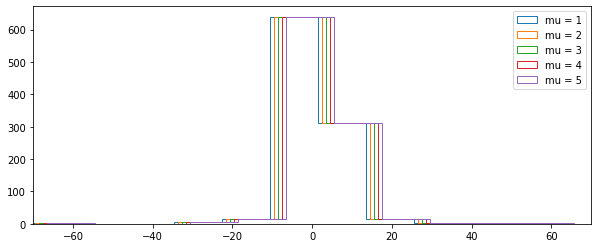

In [118]:
model = StanModel('student_t.stan')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for i in range(1, 6):
    model = StanModel('student_t.stan')
    data = dict(params = [1, i, 1])
    model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)
    x = model.extract()['student_t_results']
    plt.hist(x, bins = 50, histtype = 'step')
plt.xlim(-70, 70)
plt.legend(['mu = 1' ,'mu = 2', 'mu = 3', 'mu = 4', 'mu = 5', 'mu = 6'])
plt.show()

Incrementing mu parameter couses moving the center (mean) to left or right, depending of whether the value is positive or negative.

* Changing sigma parameter

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.


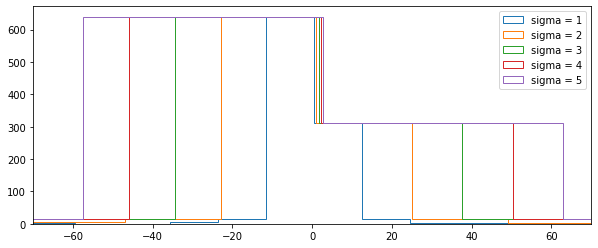

In [119]:
model = StanModel('student_t.stan')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for i in range(1, 6):
    model = StanModel('student_t.stan')
    data = dict(params = [1, 0, i])
    model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)
    x = model.extract()['student_t_results']
    plt.hist(x, bins = 50, histtype = 'step')
plt.xlim(-70, 70)
plt.legend(['sigma = 1' ,'sigma = 2', 'sigma = 3', 'sigma = 4', 'sigma = 5', 'sigma = 6'])
plt.show()

The greater value we set to sigma, the greater the range is.

* Changing numer of samples in order to check how mead and variance are changing 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.


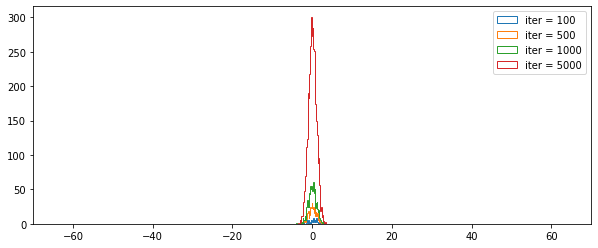

In [120]:
model = StanModel('student_t.stan')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
data_values = [100, 500, 1000, 5000]

for i in data_values:
    model = StanModel('student_t.stan')
    data = dict(params = [i, 0, 1])
    model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=i, warmup=0,chains=1)
    x = model.extract()['student_t_results']
    plt.hist(x, bins = 50, histtype = 'step')
plt.xlim(-70, 70)
plt.legend(['iter = 100' ,'iter = 500', 'iter = 1000', 'iter = 5000'])
plt.show()

### Exercise 4

Firstly, we are creating stan model, modeling multivariate normal distributions.

In [35]:
with open('multi_normal.stan', 'r') as file:
    print(file.read())

data {
    vector[2] mu;
    matrix[2, 2] sigma;
}
generated quantities {
    vector[2] y = multi_normal_rng(mu, sigma);
}


In [37]:
model = StanModel('multi_normal.stan')
data = {'mu': np.array([0, 0]), 'sigma': np.array([[1, 0.5], [0.5, 1]])}
model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ba3c7cd858044f25b8de80e17ce187e NOW.


Below we can see counted and returned by our model values of 'x' and 'y'.

In [38]:
y = model.extract()['y']
y = pd.DataFrame(y)
y.head()

,0,1
0,-0.740717,-0.742292
1,-2.084728,0.271232
2,1.917552,1.302749
3,-1.214478,-1.276060
4,0.710215,-0.049985
...,...,...
995,-1.255901,-0.450052
996,-0.214432,0.340387
997,0.352092,-0.856045
998,0.089417,0.212520


Now we can print 2D histogram

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f82ea1e4d29c51ce238a32112c58d87c NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ba3c7cd858044f25b8de80e17ce187e NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ba3c7cd858044f25b8de80e17ce187e NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ba3c7cd858044f25b8de80e17ce187e NOW.


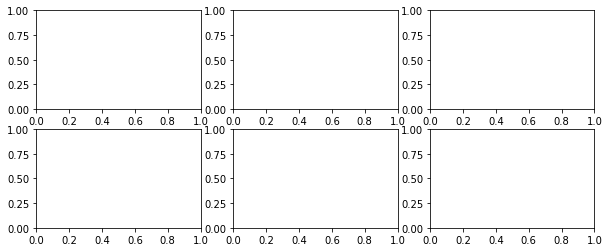

In [49]:
model = StanModel('student_t.stan')
fig, ax = plt.subplots(2, 3, figsize=(10, 4))
results = []

for i in range(1,4):
    model = StanModel('multi_normal.stan')
    data = {'mu': np.array([0, 0.1*i]), 'sigma': np.array([[1, 0.2*i], [0.2*i, 1]])}
    model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)
    y = model.extract()['y']
    y = pd.DataFrame(y)
    y.columns = ['x', 'y']
    results.append(y)

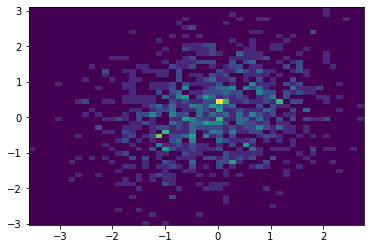

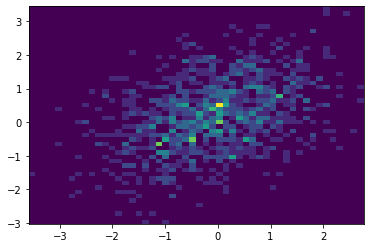

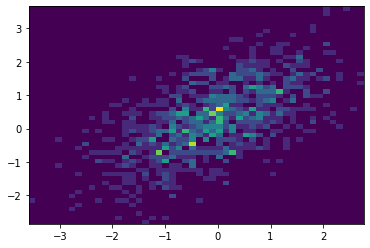

In [50]:
for elem in results:
    plt.hist2d(elem['x'], elem['y'], bins = 50)
    plt.show()

Density plots are printed for both 'x' and 'y' variable.

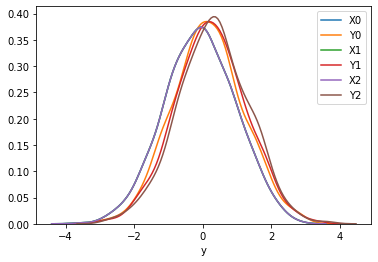

In [63]:
import seaborn as sns
for i in range(len(results)):
    sns.distplot(results[i]['x'], hist = False, label = 'X' + str(i))
    sns.distplot(results[i]['y'], hist = False, label = 'Y' + str(i))

There is a special relationship between the correlation coefficient matrix and the covariance matrix (covariance matrix is sigma matrix). Below we can see how individual variances and correlations influence the distribution. 

In [67]:
for elem in results:
    print(np.corrcoef(elem['x'], elem['y']))

[[1.         0.18948606]
 [0.18948606 1.        ]]
[[1.         0.39144955]
 [0.39144955 1.        ]]
[[1.         0.59437466]
 [0.59437466 1.        ]]


* Creating stan model for 3D normal distribution

In [68]:
with open('multi_normal_3D.stan', 'r') as file:
    print(file.read())

data {
    vector[3] mu;
    matrix[3, 3] sigma;
}
generated quantities {
    vector[3] y = multi_normal_rng(mu, sigma);
}


In [74]:
model = StanModel('multi_normal_3D.stan')
data = {'mu': np.array([0, 0, 0]), 'sigma': np.array([[1, 0.25, 0.75], [0.25, 1, 0.5], [0.75, 0.5, 1]])}
model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_14f34f71ff84b801fccf32a619df85f3 NOW.


In [75]:
y = model.extract()['y']
y = pd.DataFrame(y)
y.head()

,0,1,2
0,0.729924,0.733019,1.217763
1,-0.768525,0.498681,0.729922
2,-0.723267,1.010568,0.037254
3,-1.408849,-0.805213,-1.477100
4,-0.071622,0.485319,-0.248472


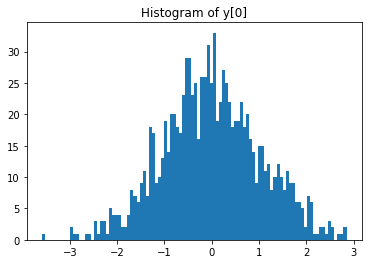

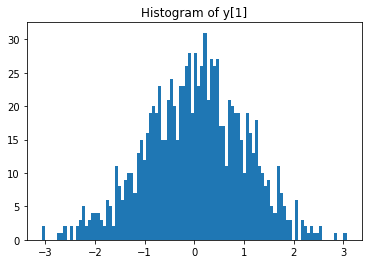

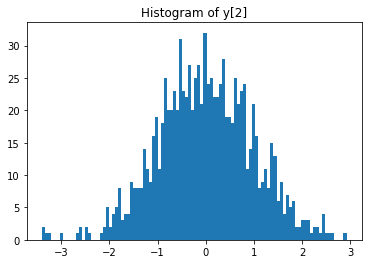

In [82]:
for i in range(3):
    plt.hist(y.iloc[:, i], bins = 100)
    plt.title("Histogram of y[" + str(i) + "]")
    plt.show()

* Creating stan model for 4D normal distribution

In [83]:
with open('multi_normal_4D.stan', 'r') as file:
    print(file.read())

data {
    vector[4] mu;
    matrix[4, 4] sigma;
}
generated quantities {
    vector[4] y = multi_normal_rng(mu, sigma);
}


In [86]:
model = StanModel('multi_normal_4D.stan')
data = {'mu': np.array([0, 0, 0, 0]), 'sigma': np.array(
[[1, 0.25, 0.75, 1],
 [0.25, 2, 1.25, 1.75],
 [0.75, 1.25, 3, 2.5], 
 [1, 1.75, 2.5, 4]])}
model = model.sampling(data=data,seed=1052020,algorithm="Fixed_param",iter=1000, warmup=0,chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a9f3726f53c4ec4524e2779a413881da NOW.


In [87]:
y = model.extract()['y']
y = pd.DataFrame(y)
y.head()

,0,1,2,3
0,0.877840,1.885276,3.034778,1.724801
1,0.631321,-1.388294,1.690062,0.448340
2,1.179961,-3.145038,-3.181745,-2.929971
3,1.052391,1.558171,-0.214411,1.949050
4,-0.552025,-1.748252,-1.063819,-1.259213


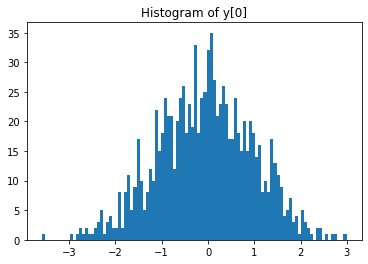

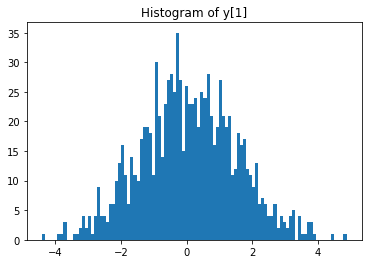

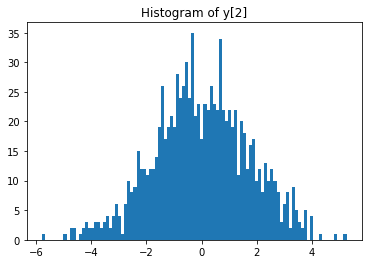

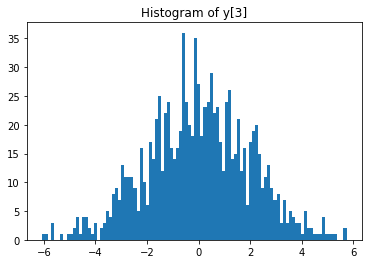

In [88]:
for i in range(4):
    plt.hist(y.iloc[:, i], bins = 100)
    plt.title("Histogram of y[" + str(i) + "]")
    plt.show()